# Getting Started with TensorFlow 2.x

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.0.0


## Recipe 1: General flow of TensorFlow algorithms

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

# Set algorithm parameters (hyperparameters)
epochs = 1200
batch_size = 32
input_size = 4
output_size = 3
learning_rate = 0.001

# Initialize variables
weights = tf.Variable(tf.random.normal(shape=(input_size, output_size), 
                                       dtype=tf.float32))

biases  = tf.Variable(tf.random.normal(shape=(output_size,), 
                                       dtype=tf.float32))

optimizer = tf.optimizers.SGD(learning_rate)

# loading data
data = tfds.load("iris", split="train")

# Training loop
for repeat in range(epochs):
    for batch in data.batch(batch_size, drop_remainder=True):
        # Transform and normalize data
        labels = tf.one_hot(batch['label'], 3)
        X = batch['features']
        X = (X - np.mean(X)) / np.std(X)

        with tf.GradientTape() as tape:
            # Define the model structure
            logits = tf.add(tf.matmul(X, weights), biases)
            # Declare the loss function
            loss = tf.reduce_mean(
                tf.nn.softmax_cross_entropy_with_logits(labels, logits))

        gradients = tape.gradient(loss, [weights, biases])
        optimizer.apply_gradients(zip(gradients, [weights, biases]))

In [4]:
# Evaluate the training fit
print(f"final loss is: {loss.numpy():.3f}")
preds = tf.math.argmax(tf.add(tf.matmul(X, weights), biases), axis=1)
ground_truth = tf.math.argmax(labels, axis=1)

for y_true, y_pred in zip(ground_truth.numpy(), preds.numpy()):
    print(f"real label: {y_true} fitted: {y_pred}")

final loss is: 0.530
real label: 0 fitted: 0
real label: 1 fitted: 1
real label: 1 fitted: 2
real label: 2 fitted: 1
real label: 2 fitted: 2
real label: 2 fitted: 2
real label: 0 fitted: 0
real label: 2 fitted: 2
real label: 1 fitted: 0
real label: 2 fitted: 2
real label: 1 fitted: 2
real label: 0 fitted: 0
real label: 1 fitted: 1
real label: 0 fitted: 0
real label: 2 fitted: 2
real label: 2 fitted: 2
real label: 0 fitted: 0
real label: 2 fitted: 1
real label: 0 fitted: 0
real label: 1 fitted: 1
real label: 2 fitted: 2
real label: 0 fitted: 0
real label: 2 fitted: 2
real label: 1 fitted: 1
real label: 0 fitted: 0
real label: 0 fitted: 0
real label: 2 fitted: 2
real label: 0 fitted: 0
real label: 1 fitted: 1
real label: 2 fitted: 2
real label: 0 fitted: 0
real label: 2 fitted: 2


## Recipe 2: Declaring variables and tensors

In [5]:
# Creating a zero-filled tensor
row_dim, col_dim = 3, 3
zero_tsr = tf.zeros(shape=[row_dim, col_dim], dtype=tf.float32)
print(zero_tsr)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(3, 3), dtype=float32)


In [6]:
# Creating a one-filled tensor
ones_tsr = tf.ones([row_dim, col_dim])
print(ones_tsr)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)


In [7]:
# Creating a constant-filled tensor
filled_tsr = tf.fill([row_dim, col_dim], 42)
print(filled_tsr)

tf.Tensor(
[[42 42 42]
 [42 42 42]
 [42 42 42]], shape=(3, 3), dtype=int32)


In [8]:
# Creating a tensor out of an existing constant
constant_tsr = tf.constant([1,2,3])
print(constant_tsr)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [9]:
# Initializing TF variables based on the shape of other tensors
zeros_similar = tf.zeros_like(constant_tsr) 
ones_similar = tf.ones_like(constant_tsr)
print(zeros_similar, ones_similar)

tf.Tensor([0 0 0], shape=(3,), dtype=int32) tf.Tensor([1 1 1], shape=(3,), dtype=int32)


In [10]:
# Specifying tensors that contain float defined intervals
linear_tsr = tf.linspace(start=0.0, stop=1.0, num=3)
print(linear_tsr)

tf.Tensor([0.  0.5 1. ], shape=(3,), dtype=float32)


In [11]:
# Specifying tensors that contain integer defined intervals
integer_seq_tsr = tf.range(start=6, limit=15, delta=3)
print(integer_seq_tsr)

tf.Tensor([ 6  9 12], shape=(3,), dtype=int32)


In [12]:
# Generating random numbers are from a uniform distribution
randunif_tsr = tf.random.uniform([row_dim, col_dim], minval=0, maxval=1)
print(randunif_tsr)

tf.Tensor(
[[0.89970124 0.63064384 0.12104619]
 [0.83114624 0.8287847  0.89316714]
 [0.93512285 0.3590051  0.6951901 ]], shape=(3, 3), dtype=float32)


In [13]:
# Getting a tensor with random draws from a normal distribution
randnorm_tsr = tf.random.normal([row_dim, col_dim], mean=0.0, stddev=1.0)
print(randnorm_tsr)

tf.Tensor(
[[ 0.9315677   0.23503697 -0.82882065]
 [ 0.50371057 -0.9399478  -0.38153183]
 [-0.85854775  0.2818724   1.6366824 ]], shape=(3, 3), dtype=float32)


In [14]:
# Generating normal random values that are assured within certain bounds
runcnorm_tsr = tf.random.truncated_normal([row_dim, col_dim], mean=0.0, stddev=1.0)
print(runcnorm_tsr)

tf.Tensor(
[[-0.8496044  -0.25719643 -0.7842462 ]
 [-0.06510501 -0.8515905   1.1225252 ]
 [ 1.0207621  -0.49198344 -0.00986596]], shape=(3, 3), dtype=float32)


In [15]:
# Randomizing entries of arrays
input_tensor = tf.range(start=0, limit=10, delta=1)
shuffled_output = tf.random.shuffle(input_tensor)
print(shuffled_output)

tf.Tensor([4 5 3 9 0 1 2 8 6 7], shape=(10,), dtype=int32)


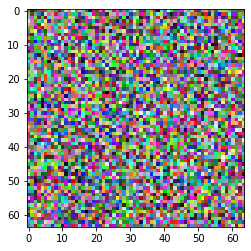

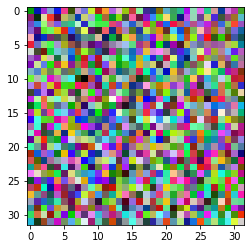

In [16]:
# Randomly cropping images of size (height, width, 3)
height, width = (64, 64)
my_image = tf.random.uniform([height, width, 3], minval=0,
                             maxval=255, dtype=tf.int32)
cropped_image = tf.image.random_crop(my_image, 
                                     [height//2, width//2, 3])

import matplotlib.pyplot as plt
_ = plt.imshow(my_image)
plt.show()
_ = plt.imshow(cropped_image)
plt.show()

In [17]:
# Wrapping a tensor into a corresponding variables function
my_var = tf.Variable(tf.zeros([row_dim, col_dim])) 
print(my_var)

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>


## Recipe 3: Leveraging eager execution

In [18]:
print("Is eager execution on?", tf.executing_eagerly())

Is eager execution on? True


In [19]:
x = [[2.]]
m = tf.matmul(x, x)
print("the result is {}".format(m))

the result is [[4.]]


## Recipe 4: Working with matrices

In [20]:
# Creating an identity matrix
identity_matrix = tf.linalg.diag([1.0, 1.0, 1.0])
print(identity_matrix)

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [21]:
# Creating a matrix of random truncated values
A = tf.random.truncated_normal([2, 3]) 
print(A)

tf.Tensor(
[[ 9.4630040e-02 -7.7388042e-01  9.5528003e-04]
 [-4.1926143e-01  9.9890965e-01 -1.2515219e+00]], shape=(2, 3), dtype=float32)


In [22]:
# Creating a constant filled matrix
B = tf.fill([2, 3], 5.0) 
print(B)

tf.Tensor(
[[5. 5. 5.]
 [5. 5. 5.]], shape=(2, 3), dtype=float32)


In [23]:
# Creating a matrix of random uniform values
C = tf.random.uniform([3,2]) 
print(C)

tf.Tensor(
[[0.7586386  0.81580055]
 [0.51116264 0.6277541 ]
 [0.26418257 0.6645    ]], shape=(3, 2), dtype=float32)


In [24]:
?tf.convert_to_tensor

In [25]:
# Converting a Numpy array to a TF matrix
D = tf.convert_to_tensor(np.array([[1., 2., 3.],[-3., -7., -1.],[0., 5., -2.]]),
                         dtype=tf.float32)
print(D)

tf.Tensor(
[[ 1.  2.  3.]
 [-3. -7. -1.]
 [ 0.  5. -2.]], shape=(3, 3), dtype=float32)


In [26]:
# Adding matrices
print(A+B)

tf.Tensor(
[[5.0946302 4.2261195 5.000955 ]
 [4.5807385 5.9989095 3.748478 ]], shape=(2, 3), dtype=float32)


In [27]:
# Subtracting matrices
print(B-B)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)


In [28]:
# Multiplying matrices
print(tf.matmul(B, identity_matrix))

tf.Tensor(
[[5. 5. 5.]
 [5. 5. 5.]], shape=(2, 3), dtype=float32)


In [29]:
# Element-wise multiplication of two matrices
print(tf.multiply(D, identity_matrix))

tf.Tensor(
[[ 1.  0.  0.]
 [-0. -7. -0.]
 [ 0.  0. -2.]], shape=(3, 3), dtype=float32)


In [30]:
# Transposing a matrix
print(tf.transpose(C))

tf.Tensor(
[[0.7586386  0.51116264 0.26418257]
 [0.81580055 0.6277541  0.6645    ]], shape=(2, 3), dtype=float32)


In [31]:
# Calculating the determinant of a matrix
print(tf.linalg.det(D))

tf.Tensor(-38.0, shape=(), dtype=float32)


In [32]:
# Finding the inverse of a square matrix
print(tf.linalg.inv(D))

tf.Tensor(
[[-0.50000006 -0.5        -0.50000006]
 [ 0.15789475  0.05263158  0.21052633]
 [ 0.39473686  0.13157895  0.0263158 ]], shape=(3, 3), dtype=float32)


In [33]:
# Operating the Cholesky decomposition of a matrix:
print(tf.linalg.cholesky(identity_matrix))

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [34]:
# Computing eigenvalues and eigenvectors of a matrix:
print(tf.linalg.eigh(D))

(<tf.Tensor: id=389022, shape=(3,), dtype=float32, numpy=array([-10.659076  ,  -0.22750695,   2.886583  ], dtype=float32)>, <tf.Tensor: id=389023, shape=(3, 3), dtype=float32, numpy=
array([[-0.21749546, -0.6325011 , -0.74339646],
       [-0.84526515, -0.25879988,  0.46749276],
       [ 0.48808062, -0.7300446 ,  0.4783433 ]], dtype=float32)>)


## Recipe 5: Operations in TensorFlow

In [35]:
# Divisions
print(tf.math.divide(3, 4)) # divide() returns the same type as the inputs
print(tf.math.truediv(3, 4))

0.75
tf.Tensor(0.75, shape=(), dtype=float64)


In [36]:
# Floor rounded division
print(tf.math.floordiv(3.0,4.0))

tf.Tensor(0.0, shape=(), dtype=float32)


In [37]:
# Module of a division
print(tf.math.mod(22.0, 5.0))

tf.Tensor(2.0, shape=(), dtype=float32)


In [38]:
# Cross product between two tensors 
print(tf.linalg.cross([1., 0., 0.], [0., 1., 0.]))

tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)


In [39]:
# Creating custom functions
def pi_tan(x):
    return tf.tan(3.1416/x)

print(pi_tan(4))

def custom_polynomial(value): 
    return tf.math.subtract(3 * tf.math.square(value), value) + 10

print(custom_polynomial(11))

tf.Tensor(1.0000036, shape=(), dtype=float32)
tf.Tensor(362, shape=(), dtype=int32)


## Recipe 6: implementing activation functions

In [40]:
# ReLu
print(tf.nn.relu([-3., 3., 10.]))

tf.Tensor([ 0.  3. 10.], shape=(3,), dtype=float32)


In [41]:
# Capped max ReLu
print(tf.nn.relu6([-3., 3., 10.]))

tf.Tensor([0. 3. 6.], shape=(3,), dtype=float32)


In [42]:
# Sigmoid
print(tf.nn.sigmoid([-1., 0., 1.]))

tf.Tensor([0.26894143 0.5        0.7310586 ], shape=(3,), dtype=float32)


In [43]:
# Hyper tangent
print(tf.nn.tanh([-1., 0., 1.]))

tf.Tensor([-0.7615942  0.         0.7615942], shape=(3,), dtype=float32)


In [44]:
# Softsign
print(tf.nn.softsign([-1., 0., -1.]))

tf.Tensor([-0.5  0.  -0.5], shape=(3,), dtype=float32)


In [45]:
# Softplus
print(tf.nn.softplus([-1., 0., -1.]))

tf.Tensor([0.31326166 0.6931472  0.31326166], shape=(3,), dtype=float32)


In [46]:
# Elu
print(tf.nn.elu([-1., 0., -1.])) 

tf.Tensor([-0.63212055  0.         -0.63212055], shape=(3,), dtype=float32)


In [47]:
def swish(x):
    return x * tf.nn.sigmoid(x)

print(swish([-1., 0., 1.]))

tf.Tensor([-0.26894143  0.          0.7310586 ], shape=(3,), dtype=float32)


## Recipe 7: downloading datasets

### Iris Dataset

In [48]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

iris = tfds.load('iris', split='train')

### Birth weight data

In [49]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

birthdata_url = 'https://raw.githubusercontent.com/PacktPublishing/TensorFlow-2-Machine-Learning-Cookbook-Third-Edition/master/birthweight.dat' 
path = tf.keras.utils.get_file(birthdata_url.split("/")[-1], birthdata_url)

def map_line(x):
    return tf.strings.to_number(tf.strings.split(x))

birth_file = (tf.data
              .TextLineDataset(path)
              .skip(1)     # Skip first header line
              .map(map_line)
             )

### Housing data

In [50]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

housing_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
path = tf.keras.utils.get_file(housing_url.split("/")[-1], housing_url)

def map_line(x):
    return tf.strings.to_number(tf.strings.split(x))

housing = (tf.data
           .TextLineDataset(path)
           .map(map_line)
          )

### MNIST 

In [51]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

mnist = tfds.load('mnist', split=None)
mnist_train = mnist['train']
mnist_test = mnist['test']

### SPAM-HAM 

In [52]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

zip_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
path = tf.keras.utils.get_file(zip_url.split("/")[-1], zip_url, extract=True)

path = path.replace("smsspamcollection.zip", "SMSSpamCollection")

def split_text(x):
    return tf.strings.split(x, sep='\t')

text_data = (tf.data
             .TextLineDataset(path)
             .map(split_text)
            )

### Movie review data

In [53]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

movie_data_url = 'http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz'
path = tf.keras.utils.get_file(movie_data_url.split("/")[-1], movie_data_url, extract=True)

path = path.replace('.tar.gz', '')

with open('movie_reviews.txt', 'w') as review_file: 
    for response, filename in enumerate(['\\rt-polarity.neg', '\\rt-polarity.pos']):
        with open(path+filename, 'r') as movie_file:
            for line in movie_file:
                review_file.write(str(response) + '\t' + line.encode('utf-8').decode())
                
def split_text(x):
    return tf.strings.split(x, sep='\t')

movies = (tf.data
          .TextLineDataset('movie_reviews.txt')
          .map(split_text)
         )

### CIFAR-10 image data

In [54]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

ds, info = tfds.load('cifar10', shuffle_files=True, with_info=True)

print(info)

cifar_train = ds['train']
cifar_test = ds['test']

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)



### The works of Shakespeare text data

In [55]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

shakespeare_url = 'https://raw.githubusercontent.com/PacktPublishing/TensorFlow-2-Machine-Learning-Cookbook-Third-Edition/master/shakespeare.txt'
path = tf.keras.utils.get_file(shakespeare_url.split("/")[-1], shakespeare_url)

def split_text(x):
    return tf.strings.split(x, sep='\n')

shakespeare_text = (tf.data
                    .TextLineDataset(path)
                    .map(split_text)
                   )

### English-German sentence translation data

In [56]:
import os
import pandas as pd
from zipfile import ZipFile
from urllib.request import urlopen, Request
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

sentence_url = 'https://www.manythings.org/anki/deu-eng.zip'

r = Request(sentence_url, headers={'User-Agent': 'Mozilla/5.0 (X11; U; Linux i686) Gecko/20071127 Firefox/2.0.0.11'})
b2 = [z for z in sentence_url.split('/') if '.zip' in z][0] #gets just the '.zip' part of the url

with open(b2, "wb") as target:
    target.write(urlopen(r).read()) #saves to file to disk

with ZipFile(b2) as z:
    deu = [line.split('\t')[:2] for line in z.open('deu.txt').read().decode().split('\n')]

os.remove(b2) #removes the zip file

# saving to disk prepared en-de sentence file
with open("deu.txt", "wb") as deu_file:
    for line in deu:
        data = ",".join(line)+'\n'
        deu_file.write(data.encode('utf-8'))
        
def split_text(x):
    return tf.strings.split(x, sep=',')

text_data = (tf.data
             .TextLineDataset("deu.txt")
             .map(split_text)
            )